In [9]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the model
model = load_model('./converted_keras/keras_model.h5')

In [30]:
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('./img/audi.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)

In [31]:
np.argmax(prediction)

1

In [32]:
labels = ['Sedan', 'SUV', 'Truck']
labels[np.argmax(prediction)]

'SUV'

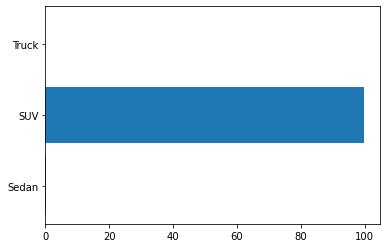

In [33]:
plt.barh(labels,prediction[0] * 100)  # 막대 그래프
plt.show()